# Лабораторная работа 0 #
## Студент: Девяткина Д.В. 
## Группа: М8О-304Б


### Постановка задачи
Требуется сформировать/получить два набора данных соответствующие следующим критериям: 
1. Один из датасетов должен представлять собой корпус документов. Язык, источник и тематика произвольна 
2. Второй датасет должен содержать категориальные, количественные признаки. Для данного датасета определить предсказываемые признаки (для задачи регрессии и классфикации). Если такого признака нет, спроектировать 

Данные датасеты будут в дальнейшем использованы в оставшихся лабораторных работах. 
По каждому датасету построить распределения признаков (в случае корпуса документов – построить распределение слов) и объяснить имеющуюся картину. Вычислить статистические характеристики признаков. Обнаружить и решить возможные проблемы с данными. Если решить данную проблему невозможно, объяснить почему.



### Использованные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

### Задание 1. Работа с датасетом с категориальными и количественными признаками


*Выбранный [датасет](•	https://www.kaggle.com/nisargpatel/automobiles) - информация об автомобилях*

In [4]:
ad = pd.read_csv('Automobile.csv')


**Вывод первых пяти строк датасета**

In [5]:
ad.head()


,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Названия столбцов,их типы и краткая информация**

In [7]:
print(ad.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [8]:
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

**Количество данных для каждого параметра, медиана, стандартное отклонение, минимум, кватили (0.25, 0.5, 0.75), максимум**

In [9]:
ad.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


**Средние характеристики для производителя Audi**

In [11]:
ad[ad['make'] == 'audi'].mean()


symboling                1.500000
normalized_losses      162.166667
wheel_base             102.733333
length                 184.766667
width                   68.850000
height                  54.833333
curb_weight           2758.666667
engine_size            130.666667
bore                     3.180000
stroke                   3.400000
compression_ratio        8.633333
horsepower             114.500000
peak_rpm              5500.000000
city_mpg                19.333333
highway_mpg             24.500000
price                17859.166667
dtype: float64

**Значение, которое цена не превысит с вероятностью 0.5(персентиль)**

In [13]:
np.percentile(ad['price'], 50)

10295.0

**Построение графиков**

In [14]:
%matplotlib inline

In [15]:
%config InlineBackend.figure_format = 'svg'

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Диаграмма зависимости цены автомобиля от количества лошадиных сил**

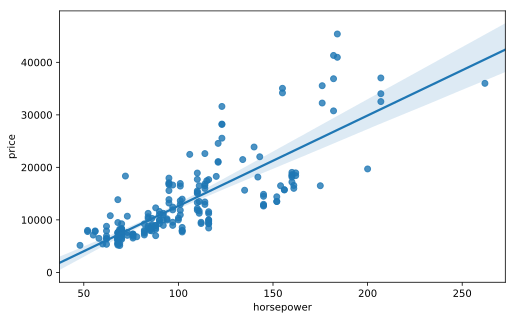

In [29]:
sns.regplot(x='horsepower', y='price', data=ad)

**Гистограмма зависимости цены автомобиля от марки**

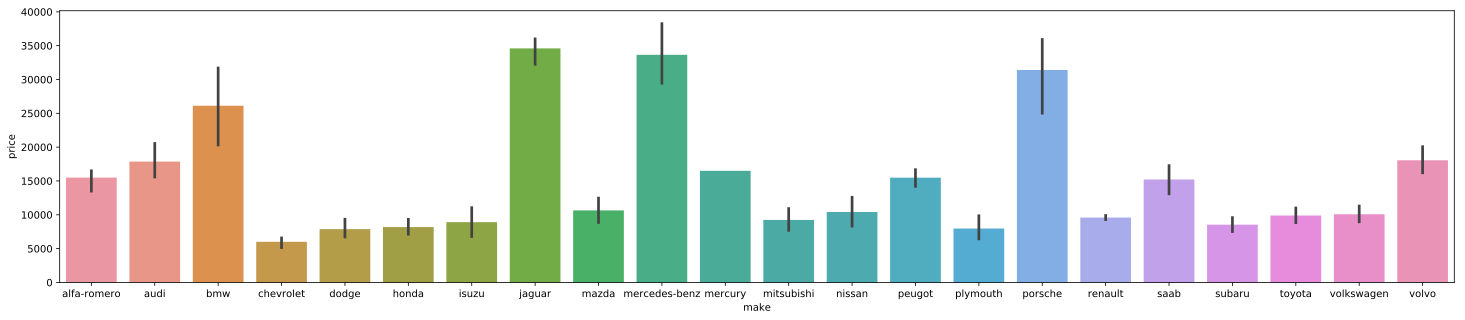

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5
sns.barplot(data = ad, x = 'make', y = 'price')

### Задание 2. Работа с корпусом текстовых доументов


*Выбранный [корпус](•	https://github.com/kavgan/OpinRank/blob/master/OpinRankDatasetWithJudgments.zip) докупентов - отзывы на отели в 3 городах: Лондон, Дубаи, Лас-Вегас*

Чтобы сильно не опаздывать по дедлайну, проанализировала только 236 файлов c:

**Нахождение наиболее встречающихся слов в отзывах на отели в Дубаи**

In [91]:
import nltk
import os
from collections import Counter
directory = 'Desktop/6 семестр/искусственный интеллект/ML/text datas/dubai/'
files = os.listdir(directory)

text = ''
for file in files:
    hotel = open(directory+file, 'r')
    for line in hotel:
        text += line

tokens = nltk.word_tokenize(text)
c = Counter(tokens)
most = dict(c.most_common(30))
for i in ',.!':
    most.pop(i)
most

{'the': 133363,
 'and': 82263,
 'a': 63835,
 'to': 62745,
 'was': 41822,
 'in': 39960,
 'of': 37244,
 'is': 34394,
 'hotel': 30084,
 'for': 28236,
 'I': 25672,
 'we': 25587,
 'you': 22661,
 'it': 21959,
 'at': 21581,
 'The': 21177,
 'were': 18887,
 'with': 18519,
 'but': 17213,
 'on': 16932,
 'are': 15666,
 'not': 15049,
 'very': 14962,
 'that': 14721,
 'this': 14364,
 'room': 14238,
 'as': 13771}

**Построение гистограммы распределения наиболее часто встречающихся слов** 

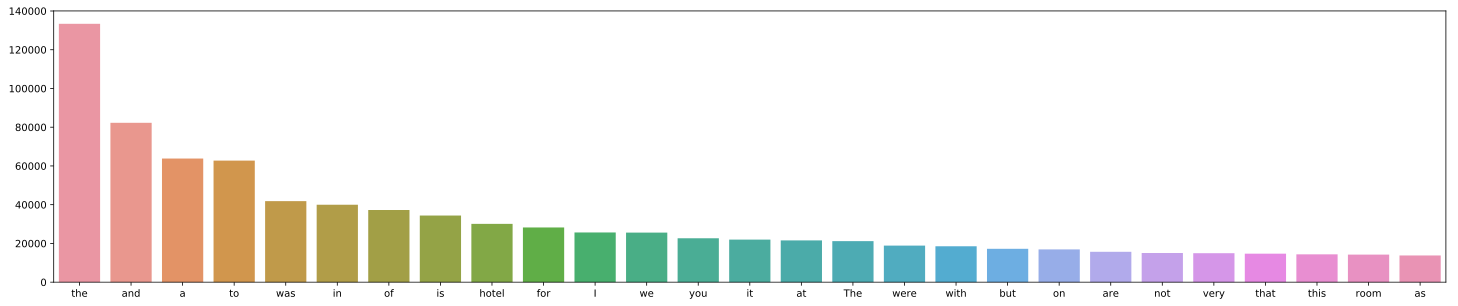

In [98]:
data = {'x':[], 'y':[]}
for label, coord in most.items():
    data['x'].append(label)
    data['y'].append(coord)
sns.barplot(x = data['x'], y = data['y'])